#### DSC550-T301 
##### Chitramoy Mukherjee
##### Week-5
##### Date: 1/9/2023

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import numpy as np
import pandas as pd
import textblob           
from textblob import TextBlob
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score




from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

### Reading the labeledTrainData.tsv file into DataFrame
df = pd.read_csv("C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-550\Week-5\\labeledTrainData.tsv", sep='\t', encoding='utf-8')

# Display the first few rows of the DataFrame to ensure it's loaded properly
print(df)

df.columns

            id  sentiment                                             review
0       5814_8          1  With all this stuff going down at the moment w...
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2       7759_3          0  The film starts with a manager (Nicholas Bell)...
3       3630_4          0  It must be assumed that those who praised this...
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...
...        ...        ...                                                ...
24995   3453_3          0  It seems like more consideration has gone into...
24996   5064_1          0  I don't believe they made this film. Completel...
24997  10905_3          0  Guy is a loser. Can't get girls, needs to buil...
24998  10194_3          0  This 30 minute documentary Buñuel made in the ...
24999   8478_8          1  I saw this movie as a child and it broke my he...

[25000 rows x 3 columns]


Index(['id', 'sentiment', 'review'], dtype='object')

#### Split it into Training and Test set.

In [4]:
# Split the data into features (X) and target variable (y)
X = df['review']
y = df['sentiment']

# Split the data into training and test sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the training and test sets

print("Training set :", X_train.shape, y_train.shape)
print("Testing set :", X_test.shape, y_test.shape)

Training set : (20000,) (20000,)
Testing set : (5000,) (5000,)


####  Fit and apply the tf-idf vectorization to the training set.

In [6]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on training set data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Display the TF-IDF matrix for the training set
print("TF-IDF matrix for training set:", X_train_tfidf.toarray())

TF-IDF matrix for training set: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Apply but  DO NOT FIT the tf-idf vectorization to the test set(Why?).

In [7]:
# Transform the test set using the already fitted TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the TF-IDF matrix for the test set
print("TF-IDF matrix for test set:", X_test_tfidf.toarray())

# Apply but DO NOT FIT  the tf-idf vectorization to the test set(Why?).
# When utilizing TF-IDF vectorization on the test set, avoid fitting the vectorizer new. The vectorizor has already undergone 
# traing on the training set, and it's tranfdormation must remain consistent across both sets. Fitting the vectorizer independently on the 
# test set may introduce disparities in vocabulary and document-term matrix, resulting in inaccurate representations and potentially 
# degrading medoel performance.Consequently, apply the vectorizer to the test set using the parameters acquired suring the training set fitting.

TF-IDF matrix for test set: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Train a logistic regression using the training data

In [10]:
# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the model on the TF-IDF transformed training data
logistic_regression_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Display the predictions 
print("Predictions:", y_pred)


Predictions: [0 1 0 ... 0 0 0]


#### Find the model accuracy on test data

In [11]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Model Accuracy on Test Set:", accuracy)

Model Accuracy on Test Set: 0.8928


#### Create a confusion matrix for the test set predictions

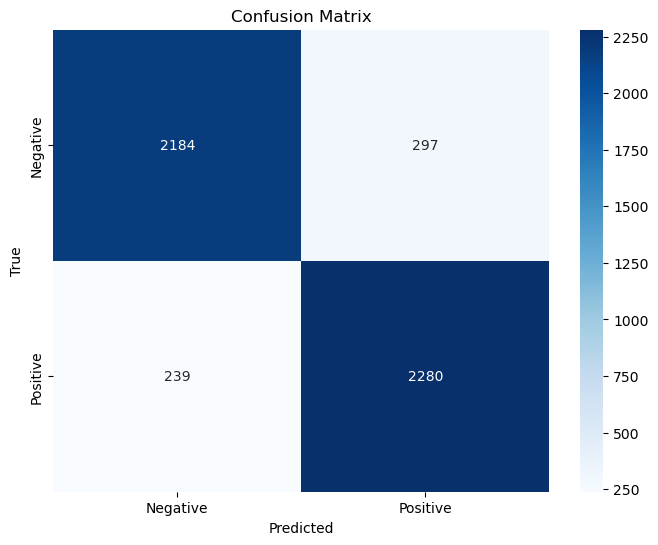

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### Get the precessio, recall and F1-score for the test set predections.

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test,  y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.8847497089639115
Recall: 0.9051210797935689
F1-Score: 0.8948194662480378


#### Create a ROC curve for the test set.

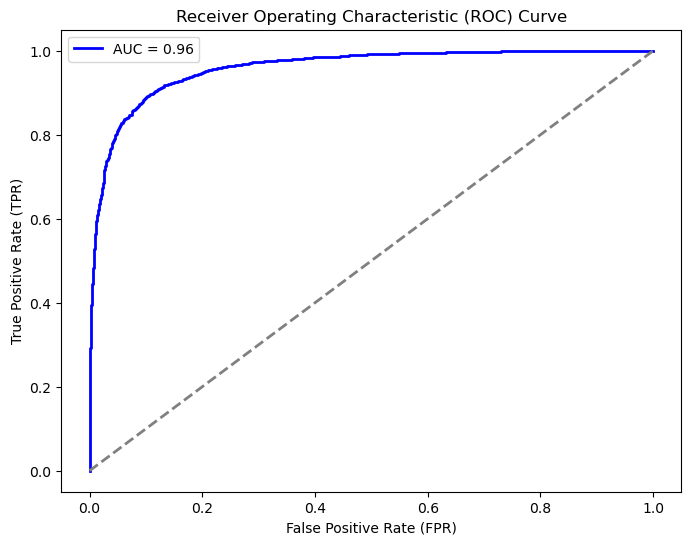

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


#### Pick another classification model (K-Nearest Neighbors) accuracy on test data

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Fit the model on the TF-IDF transformed training data
knn_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_tfidf)

# Calculate accuracy on the test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy
print("K-Nearest Neighbors Model Accuracy on Test Set:", accuracy_knn)


K-Nearest Neighbors Model Accuracy on Test Set: 0.7726


#### Create a confusion matrix for the test set predictions

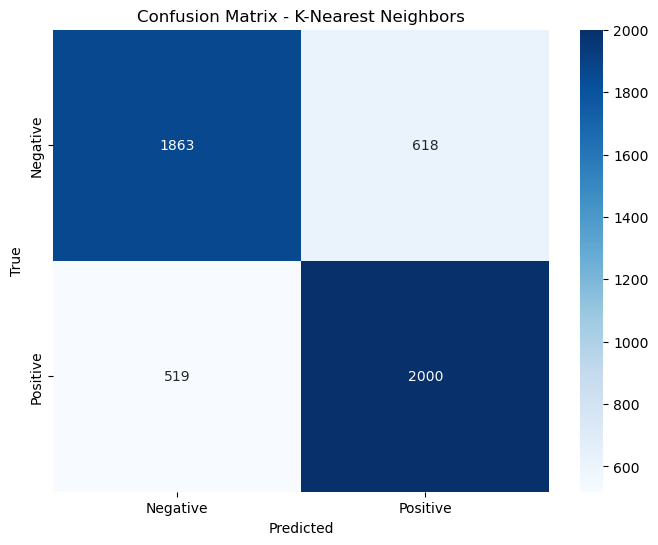

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix for K-Nearest Neighbors model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### Get the precessio, recall and F1-score for the test set predections.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for K-Nearest Neighbors model
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print the results
print("Precision (K-Nearest Neighbors):", precision_knn)
print("Recall (K-Nearest Neighbors):", recall_knn)
print("F1-Score (K-Nearest Neighbors):", f1_knn)


Precision (K-Nearest Neighbors): 0.7729598437863809
Recall (K-Nearest Neighbors): 0.7726
F1-Score (K-Nearest Neighbors): 0.7724765382618655


#### Create a ROC curve for the test set.

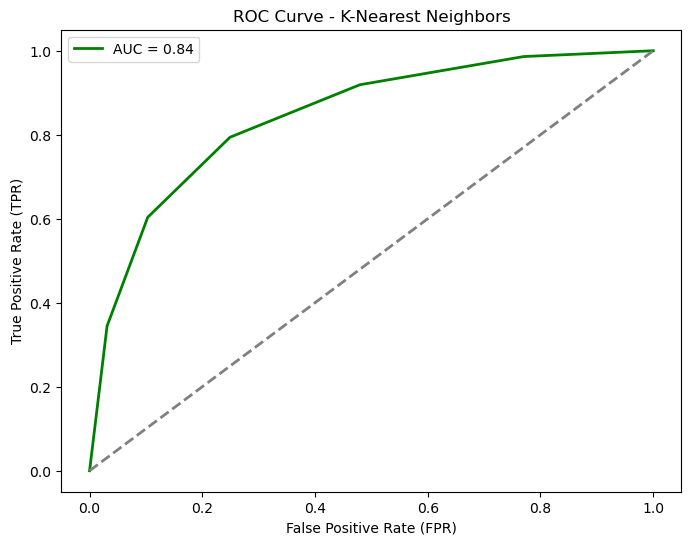

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs_knn = knn_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve for K-Nearest Neighbors model
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)

# Compute AUC score for K-Nearest Neighbors model
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

# Plot ROC curve for K-Nearest Neighbors model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend()
plt.show()
